# Distribución Binomial
###### https://www.chreinvent.com/recursos/hip%C3%B3tesis-sobre-proporcion

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from dist_prob_plotgraphs import plot_binom

## Forma de consegir emlpeo
+ En una encuesta: de 703 empleados elegidos al azar, el 61% obtuvo trabajo por medio de redes de contactos. 
+ Utilice los datos muestrales, con un nivel de significancia de 0.05, para probar la aseveración de que
    + la mayoría de los empleados (más del 50%) consiguen su trabajo por medio de redes de contactos. 
+ El siguiente es un resumen de la aseveración y de los datos muestrales:
    + Aseveración: La mayoría de los empleados consigue trabajo por medio de redes de contactos. 
        + Es decir, p > 0.5.
        + Datos muestrales:
            + n=703
            + pˆ=0.61

mean: 351.5, var: 175.75, skew: 0.0, kurt: -0.002844950213371266


(<Figure size 640x480 with 1 Axes>, <Axes: >)

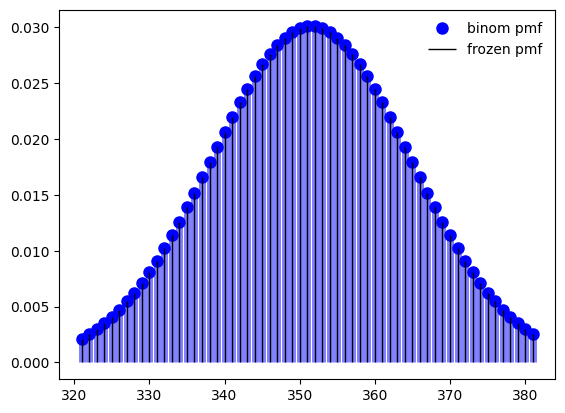

In [2]:
# crea una distribución binomial con una muestra de tamaño 100 y una proporción del 40%
n=703
p=0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# imprime sus estadísticos
print(f"mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

# plotea la función de distribución
plot_binom(n, p)

## Nivel de significancia alfa
1. Alfa bilateral (opuesto a nivel de signigicancia)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

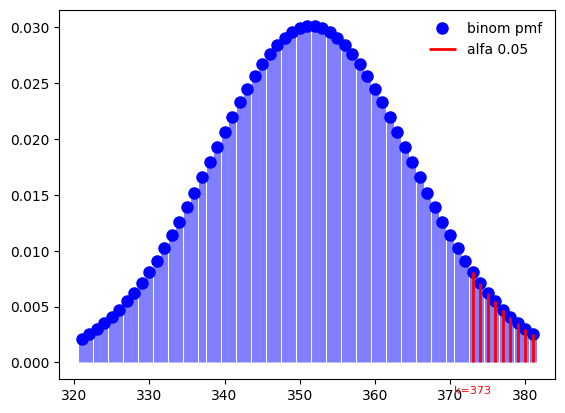

In [3]:
# Grafica la función indicando un nivel de Significancia alfa del 5% bilateral
# n: tamaño muestra 703, p: proporción 0.P0=0.5, alfa: nivel de significancia 0.05 (1-nivel de confianza)
plot_binom(n, p, tipo='right')

## Potencia de una Prueba de Hipótesis
+ Suponga que tenemos la hipótesis nula, la hipótesis alternativa, el nivel de significancia y los datos muestrales siguientes
    + H0: p = 0.5 
    + H1: p > 0.5.      
    + Nivel de significancia: alfa = 0.05
    + Tamaño muestral: n = 703
    + Proporción muestral: pˆ = 61/100*703

### Resolución por scipy
+ Utilizamos la distribución binom(n,p) para comparar la media H0 con la H1 y su p-value correspondiente.
+ Se grafica para tener interpretación por visualización.

Estadísticos del caso: mean: 351.5, var: 175.75, skew: 0.0, kurt: -0.002844950213371266


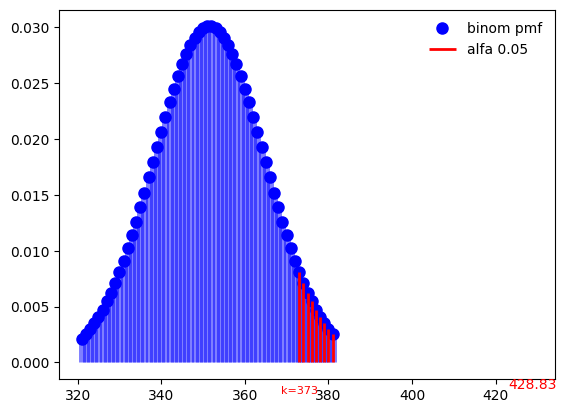

k(H0 = p0 = mean) = 351.5       k(1-alfa) = 373.0       k(H1 = p1 = p_hat) = 428.83
p_value:  2.7521904307267533e-09       vs          alfa: 0.05


In [9]:
# crea una distribución binomial con una muestra de tamaño 703 y una proporción del 50% P0 de H0
alfa = 0.05
n=703
p=0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# imprime sus estadísticos
print(f"Estadísticos del caso: mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

p_hat = 0.61            # p gorro es la proporción de la hipótesis alternativa
k_p_hat = p_hat * 703   # a p gorro le corresponde un valor k o x proporcional

# Dibujar la distribución y las zonas críticas
fig, ax = plot_binom(n, p, tipo='right')
# Dibujar las líneas punteadas en pmf(H1)
ax.plot([k_p_hat, k_p_hat], [0, binom(n, p).pmf(k_p_hat)], linestyle="dashed", color='r')
ax.text(k_p_hat, -0.002, f"{k_p_hat}", ha='center', va='center', fontsize=10, color='red')
plt.show()

p_value = binom(n,p).sf(k_p_hat)

print(f"k(H0 = p0 = mean) = {mean}       k(1-alfa) = {binom.ppf(1-alfa, n, p)}       k(H1 = p1 = p_hat) = {k_p_hat}")
print(f"p_value:  {p_value}       vs          alfa: {0.05}")

### Resolución por formulas clásicas
+ Utilizamos el estadístico estandarizado z y la aproximación normal
+ La formula es z= (p_hat - p_0)/ sqrt(p_0 * q_0/n)

Estadístico z: 5.8331
Valor crítico: 1.6449
Valor P: 0.0000
Rechazar la hipótesis nula: La mayoría de los empleados consigue trabajo por medio de redes de contactos.


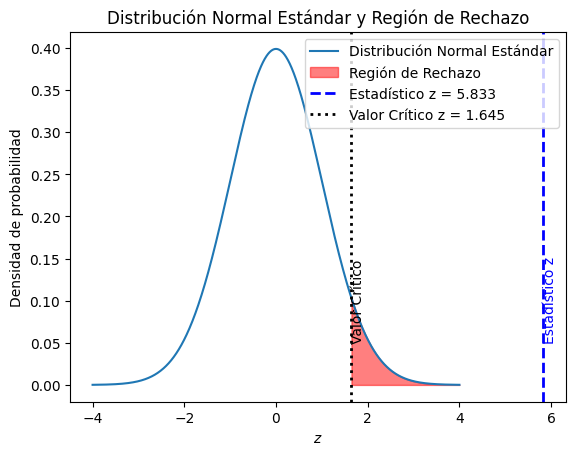

In [12]:
# Datos muestrales y proporciones
n = 703  # Tamaño de la muestra
p_hat = 0.61  # Proporción muestral
p0 = 0.50  # Proporción poblacional bajo H0
alpha = 0.05  # Nivel de significancia

# Calcular el estadístico z
z_stat = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)

# Valor crítico para una cola
z_critical = norm.ppf(1 - alpha)

# Valor P para una cola
p_value = 1 - norm.cdf(z_stat)

# Resultados
print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor crítico: {z_critical:.4f}")
print(f"Valor P: {p_value:.4f}")

if z_stat > z_critical:
    print("Rechazar la hipótesis nula: La mayoría de los empleados consigue trabajo por medio de redes de contactos.")
else:
    print("No rechazar la hipótesis nula: No se puede concluir que la mayoría de los empleados consiga trabajo por medio de redes de contactos.")

# Graficar la distribución normal estándar
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y, label='Distribución Normal Estándar')
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.5, label='Región de Rechazo')
plt.axvline(z_stat, color='blue', linestyle='dashed', linewidth=2, label=f'Estadístico z = {z_stat:.3f}')
plt.axvline(z_critical, color='black', linestyle='dotted', linewidth=2, label=f'Valor Crítico z = {z_critical:.3f}')

# Anotaciones
plt.text(z_stat, 0.05, 'Estadístico z', color='blue', rotation=90, verticalalignment='bottom')
plt.text(z_critical, 0.05, 'Valor Crítico', color='black', rotation=90, verticalalignment='bottom')

plt.title('Distribución Normal Estándar y Región de Rechazo')
plt.xlabel('$z$')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()

**Observaciones**
+ Con los dos métodos de cálculo se obtienen los mismos resultados
+ El estadístico de prueba está lejos **dentro de la zona crítica**
    + k(1-alfa) es menor que k(H1)
    + El valor del estadístico de prueba z es mayor que el valor Z(alfa)
+ La probabilidad p_value es lejos menor que la probabilidad alfa
    + con ambos métodos p_value = 2.752e-09 y esto es notablemente menor que 0.05
+ **La hipótesis nula no resulta aceptable y dodría ser rechazada**

**Conclusiones**
+ Hay suficiente evidencia para apoyar la aseveración de que la mayoría de los empleados (> 50%)
    + consiguen su trabajo por medio de redes de contactos.

Éxitos observados: 428
Valor crítico: 373.0
Valor P: 0.0000
Rechazar la hipótesis nula: La mayoría de los empleados consigue trabajo por medio de redes de contactos.


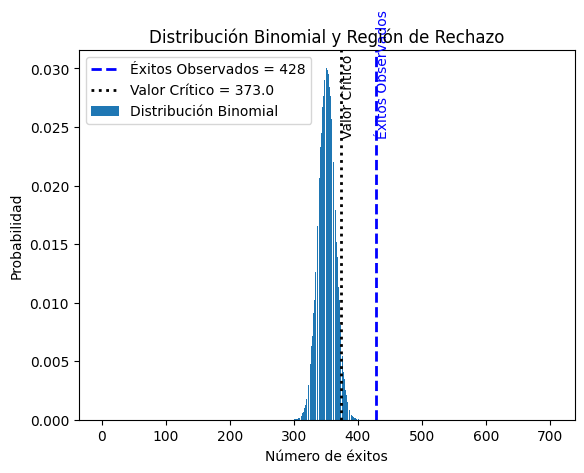

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Datos muestrales y proporciones
n = 703  # Tamaño de la muestra
p_hat = 0.61  # Proporción muestral
p0 = 0.50  # Proporción poblacional bajo H0
alpha = 0.05  # Nivel de significancia

# Calcular el número de éxitos observados
x_observed = int(p_hat * n)

# Calcular la probabilidad acumulada (valor p) usando la distribución binomial
p_value = 1 - binom.cdf(x_observed - 1, n, p0)

# Determinar el valor crítico usando la distribución binomial inversa
x_critical = binom.ppf(1 - alpha, n, p0)

# Resultados
print(f"Éxitos observados: {x_observed}")
print(f"Valor crítico: {x_critical}")
print(f"Valor P: {p_value:.4f}")

if x_observed > x_critical:
    print("Rechazar la hipótesis nula: La mayoría de los empleados consigue trabajo por medio de redes de contactos.")
else:
    print("No rechazar la hipótesis nula: No se puede concluir que la mayoría de los empleados consiga trabajo por medio de redes de contactos.")

# Graficar la distribución binomial
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p0)

plt.bar(x, y, label='Distribución Binomial')
plt.axvline(x_observed, color='blue', linestyle='dashed', linewidth=2, label=f'Éxitos Observados = {x_observed}')
plt.axvline(x_critical, color='black', linestyle='dotted', linewidth=2, label=f'Valor Crítico = {x_critical}')

# Anotaciones
plt.text(x_observed, max(y) * 0.8, 'Éxitos Observados', color='blue', rotation=90, verticalalignment='bottom')
plt.text(x_critical, max(y) * 0.8, 'Valor Crítico', color='black', rotation=90, verticalalignment='bottom')

plt.title('Distribución Binomial y Región de Rechazo')
plt.xlabel('Número de éxitos')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()


______________________________________________________________________________________________________________________________________________________________________
